In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

dolachakraborty_misogyny_meme_path = kagglehub.dataset_download('dolachakraborty/misogyny-meme')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/misogyny-meme/Test_Labels/45.jpg
/kaggle/input/misogyny-meme/Test_Labels/239.jpg
/kaggle/input/misogyny-meme/Test_Labels/187.jpg
/kaggle/input/misogyny-meme/Test_Labels/76.jpg
/kaggle/input/misogyny-meme/Test_Labels/474.jpg
/kaggle/input/misogyny-meme/Test_Labels/501.jpg
/kaggle/input/misogyny-meme/Test_Labels/760.jpg
/kaggle/input/misogyny-meme/Test_Labels/342.jpg
/kaggle/input/misogyny-meme/Test_Labels/646.jpg
/kaggle/input/misogyny-meme/Test_Labels/544.jpg
/kaggle/input/misogyny-meme/Test_Labels/795.jpg
/kaggle/input/misogyny-meme/Test_Labels/270.jpg
/kaggle/input/misogyny-meme/Test_Labels/182.jpg
/kaggle/input/misogyny-meme/Test_Labels/215.jpg
/kaggle/input/misogyny-meme/Test_Labels/115.jpg
/kaggle/input/misogyny-meme/Test_Labels/425.jpg
/kaggle/input/misogyny-meme/Test_Labels/824.jpg
/kaggle/input/misogyny-meme/Test_Labels/622.jpg
/kaggle/input/misogyny-meme/Test_Labels/440.jpg
/kaggle/input/misogyny-meme/Test_Labels/944.jpg
/kaggle/input/misogyny-meme/Test_Labels/67

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, GlobalMaxPooling2D, concatenate, Dropout, Conv2D, MaxPooling2D, Flatten


In [ ]:
img_width = 224
img_height = 224

# Set text parameters
max_words = 10000
max_len = 200

# Set batch size and number of epochs
batch_size = 32
epochs = 100

# Load and preprocess image data
def load_image(path):
    img = load_img(path, target_size=(img_width, img_height))
    img = img_to_array(img)
    img = img / 255.0
    return img

def preprocess_images(data, img_dir):
    images = []
    for image_id in data['image_id']:
        image_path = os.path.join(img_dir, f"{image_id}.jpg")
        img = load_image(image_path)
        images.append(img)
    images = np.array(images)
    return images


In [ ]:
pd.set_option('display.max_colwidth', None)
image_dir = '/kaggle/input/misogyny-meme/Train'
image_dir_dev='/kaggle/input/misogyny-meme/Dev'
image_dir_test = '/kaggle/input/misogyny-meme/Test'
# Load and preprocess training, validation, and test images
train_data = pd.read_csv('/kaggle/input/misogyny-meme/Train/train.csv')
val_data = pd.read_csv('/kaggle/input/misogyny-meme/Dev/dev.csv')
test_data = pd.read_csv('/kaggle/input/misogyny-meme/Test/test.csv')
test_data_labels = pd.read_csv('/kaggle/input/misogyny-meme/Test_Labels/test_with_labels.csv')

train_images = preprocess_images(train_data, image_dir)
val_images = preprocess_images(val_data, image_dir_dev)
test_images = preprocess_images(test_data, image_dir_test)
test_images_labels = preprocess_images(test_data_labels, image_dir_test)

In [ ]:
test_data_labels.head(60)

,image_id,labels,transcriptions
0,954,0,ഇതിന് മാത്രം പിള്ളാരെ ഇവർക്കെങ്ങനെ cilşma??....
1,239,0,ഇത് ഞാൻ ചെറുതായിരുന്നപ്പോൾ ഇത് 5ആം ക്ലാസ്സ് വരെ കണ്ടു പിന്നെ ഇത്. ഇത്... ഇന്ന് രാവിലെയും കൂടെ കണ്ടു
2,61,1,എന്തൊക്കെ ആകിയിട്ടും ഒരു മെന വരുന്നില്ലലോ നിഖിയേ..
3,984,0,ഇഞ്ചുറിക്കു ശേഷം ഇന്റർനാഷണൽ ഫുട്ബോൾലേക്കു തിരിച്ചു വന്ന മെസ്സി DIS 2 GOAL AGAINST PERU ഹേറ്റേഴ്സ്
4,774,0,* ഡോക്ടർ\nകണ്ണൻ സഹാവ്\nയ്യോ.. ഒരു equipment ഉള്ളിൽ മറന്നു വച്ചു\nഇങ്ങനെ\nപേടിക്കല്ലെ ഡോക്ടർ !!\nദോ.. ഇവിടെ വേഗം കുത്തി തുറന്ന് എടുത്തോ\nമലയാളം\nതെറ്റി വേറൊന്നും എടുക്കല്ലേ .. ഇഹ് ഇഹ്\nഎന്താ !!! വിറക്കുന്നുണ്ടല്ലോ !
5,427,1,നിന്റെ കാമുകി പുറത്ത് പോയതുകൊണ്ട് നീ വിഷമിക്കേണ്ട എന്ന് പറയുന്ന *ചങ്കത്തി..
6,960,0,MUN-SHU കളിയിൽ *Haters *Harry Maquire 1 Harry Maguire is the MOTM!
7,387,0,www\nAnju jr\nTODAY\nHi Chetta\n01:02 PM\nAthey\n01:02 PM\nenik ariyamayrunnu kuttikk enne İstamanenn\n01:03 PM\nentayalum kaathirunnath veruthe aayilla\n01:03 PM\nenikkum istamanu\n01:03 PM\nhttps://www.instagram.com /p/B80ezrXFy-h/?igshid=\n17ki4rfn78t4k\n01:03 PM\nee link onn like cheyyane\n01:04 PM\nente friendinte oru competition\naanu\n01:04 PM\nType a message\n*ചാടിക്കേറിരി അയച്ച ചങ്ക്\nAbin A Kottarakkara
8,520,0,ഒരു ഫ്രിഡ്ജ് ഉണ്ടായിരുന്നെങ്കിൽ ഇടയ്ക്ക് ഇടയ്ക്ക് ഐസ് ക്രിം ഉണ്ടാക്കാമായിരുന്നു എന്ന് പറഞ്ഞിരുന്ന ഞാൻ ഇപ്പോൾ ഒരുഓവൻ ഉണ്ടായിരുന്നെങ്കിൽ ഇടയ്ക്ക് ഇടയ്ക്ക് കേക്ക് ഉണ്ടാക്കാമായിരുന്നു എന്ന് പറയുന്നത് കേട്ട\n\nഎന്റെ ഫ്രിഡ്ജ്\nbhaai\n
9,563,1,തന്റെ നാല്പതാമത്തെ വയസ്സിലും ബിക്കിനി ഇട്ട് കമ്പിയാകുന്ന ആന്റിയെ കാണണോ? ദേ നോക്ക് . പൂജ കുമാർ


***Textual***

***TextCNN***

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set parameters
max_words = 10000
max_len = 200
embedding_dim = 100
batch_size = 32
epochs = 100

# Load and preprocess text data
def preprocess_text(data, tokenizer=None, fit_tokenizer=False):
    if fit_tokenizer:
        tokenizer = Tokenizer(num_words=max_words)
        tokenizer.fit_on_texts(data['transcriptions'])

    sequences = tokenizer.texts_to_sequences(data['transcriptions'])
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

    return padded_sequences, tokenizer

# Load data
train_data = pd.read_csv('/kaggle/input/misogyny-meme/Train/train.csv')
val_data = pd.read_csv('/kaggle/input/misogyny-meme/Dev/dev.csv')
test_data = pd.read_csv('/kaggle/input/misogyny-meme/Test/test.csv')
test_labels = pd.read_csv('/kaggle/input/misogyny-meme/Test_Labels/test_with_labels.csv')

# Preprocess text data
train_sequences, tokenizer = preprocess_text(train_data, fit_tokenizer=True)
val_sequences, _ = preprocess_text(val_data, tokenizer)
test_sequences, _ = preprocess_text(test_data, tokenizer)

# Prepare labels
def preprocess_labels(data):
    return np.array(data['labels'])

train_labels = preprocess_labels(train_data)
val_labels = preprocess_labels(val_data)
test_labels = preprocess_labels(test_labels)

# Build the Text-CNN model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_sequences, train_labels,
    validation_data=(val_sequences, val_labels),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

# Evaluate on the test set
test_predictions = model.predict(test_sequences)
test_predictions = (test_predictions > 0.5).astype(int).flatten()

# Calculate metrics
accuracy = accuracy_score(test_labels, test_predictions)
precision = precision_score(test_labels, test_predictions)
recall = recall_score(test_labels, test_predictions)
f1 = f1_score(test_labels, test_predictions, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f" F1-score: {f1:.4f}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5339 - loss: 0.6855 - val_accuracy: 0.6062 - val_loss: 0.6701
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5705 - loss: 0.6711 - val_accuracy: 0.6062 - val_loss: 0.6672
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5982 - loss: 0.6346 - val_accuracy: 0.6125 - val_loss: 0.6578
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6522 - loss: 0.5522 - val_accuracy: 0.6313 - val_loss: 0.6154
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9214 - loss: 0.3597 - val_accuracy: 0.6875 - val_loss: 0.5621
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9909 - loss: 0.1184 - val_accuracy: 0.6812 - val_loss: 0.6937
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9995 - loss: 0.0255 - val_accuracy: 0.6687 - val_loss: 0.8196
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 0.6625 - val_loss: 1.

***LSTM + CNN***

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, LSTM, Bidirectional
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set parameters
max_words = 10000
max_len = 200
embedding_dim = 100
batch_size = 32
epochs = 15

# Load and preprocess text data
def preprocess_text(data, tokenizer=None, fit_tokenizer=False):
    if fit_tokenizer:
        tokenizer = Tokenizer(num_words=max_words)
        tokenizer.fit_on_texts(data['transcriptions'])

    sequences = tokenizer.texts_to_sequences(data['transcriptions'])
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

    return padded_sequences, tokenizer

# Load data
train_data = pd.read_csv('/kaggle/input/misogyny-meme/Train/train.csv')
val_data = pd.read_csv('/kaggle/input/misogyny-meme/Dev/dev.csv')
test_data = pd.read_csv('/kaggle/input/misogyny-meme/Test/test.csv')
test_labels = pd.read_csv('/kaggle/input/misogyny-meme/Test_Labels/test_with_labels.csv')

# Preprocess text data
train_sequences, tokenizer = preprocess_text(train_data, fit_tokenizer=True)
val_sequences, _ = preprocess_text(val_data, tokenizer)
test_sequences, _ = preprocess_text(test_data, tokenizer)

# Prepare labels
def preprocess_labels(data):
    return np.array(data['labels'])

train_labels = preprocess_labels(train_data)
val_labels = preprocess_labels(val_data)
test_labels = preprocess_labels(test_labels)

# Build the LSTM+Text-CNN model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=True)),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_sequences, train_labels,
    validation_data=(val_sequences, val_labels),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

# Evaluate on the test set
test_predictions = model.predict(test_sequences)
test_predictions = (test_predictions > 0.5).astype(int).flatten()

# Calculate metrics
accuracy = accuracy_score(test_labels, test_predictions)
precision = precision_score(test_labels, test_predictions)
recall = recall_score(test_labels, test_predictions)
micro_f1 = f1_score(test_labels, test_predictions, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Micro F1-score: {micro_f1:.4f}")


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5865 - loss: 0.6825 - val_accuracy: 0.6062 - val_loss: 0.6819
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5985 - loss: 0.6762 - val_accuracy: 0.6062 - val_loss: 0.6644
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6425 - loss: 0.6138 - val_accuracy: 0.6500 - val_loss: 0.6260
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9268 - loss: 0.2193 - val_accuracy: 0.7188 - val_loss: 0.7131
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9861 - loss: 0.0726 - val_accuracy: 0.7375 - val_loss: 1.0110
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9979 - loss: 0.0216 - val_accuracy: 0.7437 - val_loss: 1.1750
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 0.7375 - val_loss: 1.3025
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9956 - loss: 0.0067 - val_accuracy: 0.7375 - val_loss: 1.

***VISUAL***

***Vision Transformer***

In [ ]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
import torch
from tensorflow.keras import layers, models
import numpy as np

# Load the pretrained ViT model and feature extractor from Hugging Face
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
vit_model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k")

# This function will preprocess the image data for ViT
def preprocess_images_vit(images):
    # Convert images to PyTorch tensors and normalize using the ViT feature extractor
    return feature_extractor(images, return_tensors="pt", padding=True, truncation=True)

# Add a classification head on top of the Vision Transformer
# The ViT model will be used as a feature extractor
model = models.Sequential([
    layers.Lambda(lambda x: preprocess_images_vit(x)),
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
import pandas as pd
from transformers import ViTFeatureExtractor, ViTForImageClassification
from transformers import AdamW
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torch.utils.data import DataLoader, Dataset, random_split
import torch
import torch.nn as nn
from tqdm import tqdm

# Set image parameters
img_width = 224
img_height = 224
batch_size = 16  # Adjust as needed
epochs = 15  # Number of epochs
learning_rate = 1e-5  # Learning rate

# Load the pretrained ViT model and feature extractor from Hugging Face
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
vit_model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k")

# Freeze the pre-trained ViT layers
for param in vit_model.parameters():
    param.requires_grad = False  # Freeze layers to retain pre-trained weights

# Add a custom classification head on top of ViT
vit_model.classifier = nn.Sequential(
    nn.Linear(vit_model.config.hidden_size, 512),  # Add fully connected layer
    nn.ReLU(),
    nn.Linear(512, 1),  # Output layer for binary classification (0 or 1)
    nn.Sigmoid()  # Sigmoid activation for binary classification
)

# Ensure the model is on the correct device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vit_model.to(device)

# Create a custom dataset class to load images
class ImageDataset(Dataset):
    def __init__(self, image_paths, labels, feature_extractor):
        self.image_paths = image_paths
        self.labels = labels
        self.feature_extractor = feature_extractor

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]

        img = load_img(image_path, target_size=(img_width, img_height))
        img = img_to_array(img)
        img = self.feature_extractor(images=img, return_tensors="pt")  # Preprocess using ViT

        return img['pixel_values'].squeeze(0), torch.tensor(label, dtype=torch.float32)

# Prepare the dataset and DataLoader
image_dir_test = '/kaggle/input/misogyny-meme/Test'  # Adjust as per your data path
test_data = pd.read_csv('/kaggle/input/misogyny-meme/Test/test.csv')  # Path to your test CSV
test_image_paths = [f"{image_dir_test}/{image_id}.jpg" for image_id in test_data['image_id']]
test_labels = pd.read_csv('/kaggle/input/misogyny-meme/Test_Labels/test_with_labels.csv')  # Your labels file
test_actual_labels = test_labels['labels'].values

# Convert the paths and labels to a dataset
dataset = ImageDataset(test_image_paths, test_actual_labels, feature_extractor)

# Split dataset into train and validation (80% train, 20% validation)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoader for both training and validation
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Set up optimizer and loss function
optimizer = AdamW(vit_model.parameters(), lr=learning_rate)
loss_fn = nn.BCELoss()  # Binary Cross-Entropy for binary classification

# Fine-tune the model (forward pass, loss computation, backward pass)
def train(model, dataloader, optimizer, loss_fn):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    for batch in tqdm(dataloader):
        images, labels = batch

        # Ensure both images and labels are on the same device as the model
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Extract logits from the outputs and calculate loss
        logits = outputs.logits  # Access the logits from ImageClassifierOutput
        loss = loss_fn(logits.squeeze(), labels)  # Squeeze to match the labels shape

        # Backward pass
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predictions = (logits > 0.5).squeeze().cpu().numpy()  # Apply threshold of 0.5 for binary classification
        correct_predictions += (predictions == labels.cpu().numpy()).sum()
        total_predictions += len(labels)

    avg_loss = total_loss / len(dataloader)
    accuracy = correct_predictions / total_predictions
    return avg_loss, accuracy

# Validation loop
def evaluate(model, dataloader):
    model.eval()
    correct_predictions = 0
    total_predictions = 0
    with torch.no_grad():
        for batch in tqdm(dataloader):
            images, labels = batch

            # Ensure both images and labels are on the same device as the model
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            logits = outputs.logits  # Access the logits

            # Apply threshold for binary classification
            predictions = (logits > 0.5).squeeze().cpu().numpy()
            correct_predictions += (predictions == labels.cpu().numpy()).sum()
            total_predictions += len(labels)

    accuracy = correct_predictions / total_predictions
    return accuracy

# Training and evaluation loop
for epoch in range(epochs):
    # Training phase
    avg_loss, train_accuracy = train(vit_model, train_loader, optimizer, loss_fn)
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_loss:.4f} - Train Accuracy: {train_accuracy:.4f}")

    # Validation phase
    val_accuracy = evaluate(vit_model, val_loader)
    print(f"Epoch {epoch+1}/{epochs} - Validation Accuracy: {val_accuracy:.4f}")

# Now, make predictions on the test data
def predict_vit(model, image_paths):
    model.eval()
    predictions = []
    with torch.no_grad():
        for image_path in image_paths:
            img = preprocess_image(image_path)  # Preprocess image
            img = img.to(device)  # Ensure the image is on the same device as the model
            outputs = model(**img)  # Pass through ViT model
            logits = outputs.logits  # Get the logits
            pred = (logits > 0.5).squeeze().cpu().numpy()  # Apply threshold
            predictions.append(pred)
    return np.array(predictions)

# Get predictions on the test data
test_predictions = predict_vit(vit_model, test_image_paths)

# Evaluate using the provided metrics
accuracy = accuracy_score(test_actual_labels, test_predictions)
precision = precision_score(test_actual_labels, test_predictions)
recall = recall_score(test_actual_labels, test_predictions)
macro_f1 = f1_score(test_actual_labels, test_predictions, average='macro')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test Macro F1-Score: {macro_f1:.4f}")


/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 10/10 [00:04<00:00,  2.25it/s]


Epoch 1/15 - Train Loss: 0.6960 - Train Accuracy: 0.4688


100%|██████████| 3/3 [00:01<00:00,  2.94it/s]


Epoch 1/15 - Validation Accuracy: 0.4250


100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


Epoch 2/15 - Train Loss: 0.6905 - Train Accuracy: 0.5625


100%|██████████| 3/3 [00:00<00:00,  3.03it/s]


Epoch 2/15 - Validation Accuracy: 0.5000


100%|██████████| 10/10 [00:04<00:00,  2.47it/s]


Epoch 3/15 - Train Loss: 0.6854 - Train Accuracy: 0.6625


100%|██████████| 3/3 [00:01<00:00,  2.96it/s]


Epoch 3/15 - Validation Accuracy: 0.6000


100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


Epoch 4/15 - Train Loss: 0.6802 - Train Accuracy: 0.7000


100%|██████████| 3/3 [00:01<00:00,  2.93it/s]


Epoch 4/15 - Validation Accuracy: 0.7000


100%|██████████| 10/10 [00:04<00:00,  2.44it/s]


Epoch 5/15 - Train Loss: 0.6753 - Train Accuracy: 0.7937


100%|██████████| 3/3 [00:01<00:00,  2.83it/s]


Epoch 5/15 - Validation Accuracy: 0.7750


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


Epoch 6/15 - Train Loss: 0.6701 - Train Accuracy: 0.8063


100%|██████████| 3/3 [00:01<00:00,  2.95it/s]


Epoch 6/15 - Validation Accuracy: 0.7750


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


Epoch 7/15 - Train Loss: 0.6654 - Train Accuracy: 0.8125


100%|██████████| 3/3 [00:01<00:00,  2.91it/s]


Epoch 7/15 - Validation Accuracy: 0.7250


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


Epoch 8/15 - Train Loss: 0.6608 - Train Accuracy: 0.8313


100%|██████████| 3/3 [00:01<00:00,  2.90it/s]


Epoch 8/15 - Validation Accuracy: 0.7500


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


Epoch 9/15 - Train Loss: 0.6563 - Train Accuracy: 0.8438


100%|██████████| 3/3 [00:01<00:00,  2.93it/s]


Epoch 9/15 - Validation Accuracy: 0.7500


100%|██████████| 10/10 [00:04<00:00,  2.36it/s]


Epoch 10/15 - Train Loss: 0.6514 - Train Accuracy: 0.8438


100%|██████████| 3/3 [00:01<00:00,  2.91it/s]


Epoch 10/15 - Validation Accuracy: 0.7500


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


Epoch 11/15 - Train Loss: 0.6468 - Train Accuracy: 0.8500


100%|██████████| 3/3 [00:01<00:00,  2.81it/s]


Epoch 11/15 - Validation Accuracy: 0.7750


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


Epoch 12/15 - Train Loss: 0.6423 - Train Accuracy: 0.8500


100%|██████████| 3/3 [00:01<00:00,  2.89it/s]


Epoch 12/15 - Validation Accuracy: 0.7750


100%|██████████| 10/10 [00:04<00:00,  2.34it/s]


Epoch 13/15 - Train Loss: 0.6382 - Train Accuracy: 0.8438


100%|██████████| 3/3 [00:01<00:00,  2.83it/s]


Epoch 13/15 - Validation Accuracy: 0.7750


100%|██████████| 10/10 [00:04<00:00,  2.35it/s]


Epoch 14/15 - Train Loss: 0.6336 - Train Accuracy: 0.8438


100%|██████████| 3/3 [00:01<00:00,  2.92it/s]


Epoch 14/15 - Validation Accuracy: 0.7500


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


Epoch 15/15 - Train Loss: 0.6292 - Train Accuracy: 0.8438


100%|██████████| 3/3 [00:01<00:00,  2.80it/s]


Epoch 15/15 - Validation Accuracy: 0.7500
Test Accuracy: 0.8250
Test Precision: 0.9778
Test Recall: 0.5641
Test Macro F1-Score: 0.7945


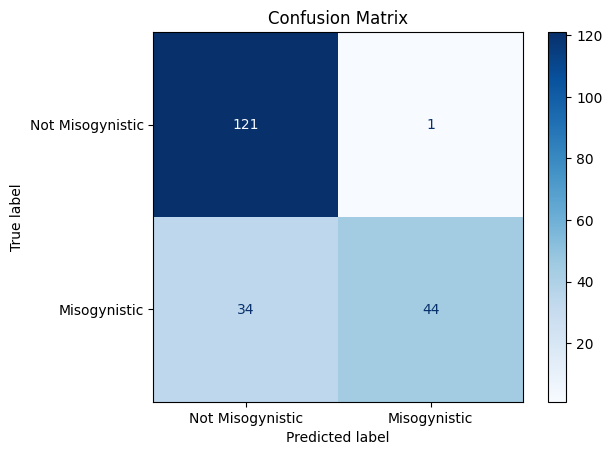

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import ViTFeatureExtractor, ViTForImageClassification
from transformers import AdamW
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from torch.utils.data import DataLoader, Dataset, random_split
import torch
import torch.nn as nn
from tqdm import tqdm
cm = confusion_matrix(test_actual_labels, test_predictions)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Misogynistic', 'Misogynistic'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

***VGG16***

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Define the VGG16 model for image processing
def create_vgg16_model(input_shape):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the base model layers
    base_model.trainable = False

    # Add custom layers on top
    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(2, activation='softmax')(x)  # Binary classification (0 or 1)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Prepare labels for training and validation
def preprocess_labels(labels):
    return to_categorical(labels, num_classes=2)

# Convert labels
train_labels = preprocess_labels(train_data['labels'])
val_labels = preprocess_labels(val_data['labels'])

# Create and train the model
input_shape = (img_width, img_height, 3)
vgg16_model = create_vgg16_model(input_shape)

# Train the model
vgg16_model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    batch_size=batch_size,
    epochs=100,
    verbose=1
)

# Evaluate the model using macro F1-score
def evaluate_model_with_macro_f1(model, test_images, test_labels):
    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)
    actual_labels = np.argmax(test_labels, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(actual_labels, predicted_labels)
    precision = precision_score(actual_labels, predicted_labels, average='macro')
    recall = recall_score(actual_labels, predicted_labels, average='macro')
    f1 = f1_score(actual_labels, predicted_labels, average='macro')

    print("Classification Report:")
    print(classification_report(
        actual_labels, predicted_labels,
        target_names=['Not Misogynistic (0)', 'Misogynistic (1)']
    ))

    return accuracy, precision, recall, f1

# Prepare test labels
test_labels = preprocess_labels(test_data_labels['labels'])

# Evaluate the model on test data
accuracy, precision, recall, f1 = evaluate_model_with_macro_f1(vgg16_model, test_images, test_labels)

print("Test Accuracy: {:.2f}%".format(accuracy * 100))
print("Macro Precision: {:.2f}".format(precision))
print("Macro Recall: {:.2f}".format(recall))
print("Macro F1-Score: {:.2f}".format(f1))


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - accuracy: 0.5619 - loss: 0.7403 - val_accuracy: 0.6062 - val_loss: 0.6644
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - accuracy: 0.5610 - loss: 0.7498 - val_accuracy: 0.6062 - val_loss: 0.6621
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.5617 - loss: 0.7584 - val_accuracy: 0.6062 - val_loss: 0.6598
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step - accuracy: 0.5446 - loss: 0.7442 - val_accuracy: 0.6062 - val_loss: 0.6576
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - accuracy: 0.5405 - loss: 0.7630 - val_accuracy: 0.6062 - val_loss: 0.6557
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - accuracy: 0.5742 - loss: 0.7470 - val_accuracy: 0.6062 - val_loss: 0.6537
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - accuracy: 0.5621 - loss: 0.7450 - val_accuracy: 0.6187 - val_loss: 0.6519
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 232ms/step - accuracy: 0.5566 - loss: 0.7241 - val_accu

***CNN***

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Define the CNN model for image processing
def create_cnn_model(input_shape):
    inputs = Input(shape=input_shape)

    # Convolutional layers
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Fully connected layers
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(2, activation='softmax')(x)  # Binary classification (0 or 1)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Prepare labels for training and validation
def preprocess_labels(labels):
    return to_categorical(labels, num_classes=2)

train_labels = preprocess_labels(train_data['labels'])
val_labels = preprocess_labels(val_data['labels'])

# Create and train the model
input_shape = (img_width, img_height, 3)
cnn_model = create_cnn_model(input_shape)

cnn_model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    batch_size=batch_size,
    epochs=100,
    verbose=1
)

# Make predictions on the test set
def evaluate_model(model, test_images, test_labels):
    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)
    actual_labels = np.argmax(test_labels, axis=1)

    accuracy = accuracy_score(actual_labels, predicted_labels)
    precision = precision_score(actual_labels, predicted_labels)
    recall = recall_score(actual_labels, predicted_labels)
    f1 = f1_score(actual_labels, predicted_labels)

    return accuracy, precision, recall, f1

# Prepare test labels
test_labels = preprocess_labels(test_data_labels['labels'])

# Evaluate the model on test data
accuracy, precision, recall, f1 = evaluate_model(cnn_model, test_images, test_labels)

print("Test Accuracy: {:.2f}%".format(accuracy * 100))
print("Test Precision: {:.2f}".format(precision))
print("Test Recall: {:.2f}".format(recall))
print("Test F1-Score: {:.2f}".format(f1))


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.5411 - loss: 0.6868 - val_accuracy: 0.6062 - val_loss: 0.6570
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.5962 - loss: 0.6481 - val_accuracy: 0.6062 - val_loss: 0.6399
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.6293 - loss: 0.6321 - val_accuracy: 0.7063 - val_loss: 0.6060
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7094 - loss: 0.5944 - val_accuracy: 0.7250 - val_loss: 0.5708
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7520 - loss: 0.5758 - val_accuracy: 0.7375 - val_loss: 0.5511
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7668 - loss: 0.5256 - val_accuracy: 0.7125 - val_loss: 0.5644
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.7334 - loss: 0.5413 - val_accuracy: 0.7625 - val_loss: 0.5299
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.7329 - loss: 0.5374 - val_accuracy: 0

In [ ]:
test_data_labels

,image_id,labels,transcriptions
0,954,0,ഇതിന് മാത്രം പിള്ളാരെ ഇവർക്കെങ്ങനെ cilşma??....
1,239,0,ഇത് ഞാൻ ചെറുതായിരുന്നപ്പോൾ ഇത് 5ആം ക്ലാസ്സ് വരെ കണ്ടു പിന്നെ ഇത്. ഇത്... ഇന്ന് രാവിലെയും കൂടെ കണ്ടു
2,61,1,എന്തൊക്കെ ആകിയിട്ടും ഒരു മെന വരുന്നില്ലലോ നിഖിയേ..
3,984,0,ഇഞ്ചുറിക്കു ശേഷം ഇന്റർനാഷണൽ ഫുട്ബോൾലേക്കു തിരിച്ചു വന്ന മെസ്സി DIS 2 GOAL AGAINST PERU ഹേറ്റേഴ്സ്
4,774,0,* ഡോക്ടർ\nകണ്ണൻ സഹാവ്\nയ്യോ.. ഒരു equipment ഉള്ളിൽ മറന്നു വച്ചു\nഇങ്ങനെ\nപേടിക്കല്ലെ ഡോക്ടർ !!\nദോ.. ഇവിടെ വേഗം കുത്തി തുറന്ന് എടുത്തോ\nമലയാളം\nതെറ്റി വേറൊന്നും എടുക്കല്ലേ .. ഇഹ് ഇഹ്\nഎന്താ !!! വിറക്കുന്നുണ്ടല്ലോ !
...,...,...,...
195,400,0,പഴശ്ശിരാജയുടെ സുഹൃത്ത് ആരെന്ന ചോദ്യത്തിന് ടിപ്പു സുൽത്താൻ എന്ന് എഴുതിയവനെ ടീച്ചർ തല്ലുന്നത് കണ്ട..\nFOXENTE KIDUVE\nഞാൻ TMM\nമനോജ്.കെ.ജയൻ എന്ന് എഴുതി കൊടുത്ത
196,421,1,യൂട്യൂബിൽ നോക്കി വെളുക്കാൻ പേസ്റ്റ് മുഖത്തു തേച്ചതിനു അമ്മ വഴക്കുപറഞ്ഞപ്പോൾ.. ഞാൻ* അതിനു ഞാൻ പല്ലുതേക്കാൻ പേസ്റ്റ് എടുക്കുന്നില്ലല്ലോ.
197,254,0,"നമ്മുടെ ജനറേഷനിലെ പിള്ളേരുടെ അപ്പൻമാരുടെ പേരുകൾ ഗോപാലൻ കുഞ്ഞാലി രാഘവൻ നമ്മുടെ പേരകുട്ടികൾ നമ്മളെ \nവിളിക്കാൻ പോകുന്നത് രാഹുൽ അപ്പൂപ്പൻ അജ്മൽ അപ്പൂപ്പൻ റോഷൻ അപ്പൂപ്പൻ \nരമ്യ മുത്തശ്ശി, അനു അമ്മുമ്മ"
198,463,1,എന്നാലും എന്റെ ലെച്ചു…


In [ ]:
import pandas as pd

# Define a function to count total words for each label
def count_words_by_label(data, label_column, text_column):
    label_word_counts = {}
    for label in data[label_column].unique():
        # Filter rows by label
        label_data = data[data[label_column] == label]
        # Concatenate all text and split into words
        total_words = label_data[text_column].str.split().apply(len).sum()
        label_word_counts[label] = total_words
    return label_word_counts

# Assuming your CSV files have columns like 'label' and 'text'
train_data['word_count'] = train_data['transcriptions'].str.split().apply(len)
val_data['word_count'] = val_data['transcriptions'].str.split().apply(len)
test_data_labels['word_count'] = test_data_labels['transcriptions'].str.split().apply(len)

# Combine all datasets into one (train, validation, and test)
all_data = pd.concat([train_data, val_data, test_data_labels])

# Count total words for each label in the combined dataset
label_word_counts_all = count_words_by_label(all_data, label_column='labels', text_column='transcriptions')

# Print the word counts for each label in the entire dataset
print("Total words for each label in the entire dataset (train + val + test):")
for label, count in label_word_counts_all.items():
    print(f"Label {label}: {count}")


Total words for each label in the entire dataset (train + val + test):
Label 0: 11004
Label 1: 6398


In [ ]:
val_data

,image_id,labels,transcriptions
0,685,1,ചക്കക്കൊക്കെ ഇപ്പൊ എന്താ വില അല്ലെ എന്റെ പാർവ്വതി ചേച്ചി
1,796,0,ഗോവിന്ദൻ ഇഷ്\nED കള്ള കേസ് എടുത്തു സഹകരണമേഖലയെ തകർക്കാൻ ശ്രമിക്കുകയാണ്\n\nസഹകരണ മേഖലയിലെ പണം കൊണ്ട് പോകാനാണ് അവർ ശ്രമിക്കുന്നത്. ശക്തമായി പ്രതിരോധിക്കണം\nകരുവന്നൂരിലെ ജനങ്ങൾ\nമലയാളം\nഞങ്ങൾ ഒറ്റയ്ക്ക് കൊണ്ട് പോകേണ്ട പണമാണവർ .
2,641,1,ആരൊക്കെ എന്തൊക്കെ പറഞ്ഞാലും പെണ്ണ് ദിലീപ് ഷോയ്ക്ക് പോയേൽ പിന്നെ നല്ലരീതിക്കിടന്ന് കൊടുക്കുന്നുണ്ട് ആചന്തിക്കൊക്കെ എന്താ ഒരു ഷേപ്പ്
3,701,1,നമ്മുടെ എല്ലാരുടേം സ്കൂൾ ജീവിതത്തിൽ ഇങ്ങനൊരു ടീച്ചർ കാണും പഠിപ്പിക്കുമ്പോൾ അവരുടെ ഓരോ ഇഞ്ചും നോക്കി നമ്മൾ വെള്ളമിറക്കിയും കാണും
4,926,0,വെള്ളം കുടിയ്ക്കാൻ പോയ ദില്ലിയ്ക്ക്\nചിക്കൻ ബിരിയാണി കിട്ടിയപ്പോൾ ഉണ്ടായ ഫീലാണ്\nഈ സീൻ ഫോണിൽ കാണാതെ തിയേറ്ററിൽ കണ്ടപ്പോൾ കിട്ടിയ ഫീൽ
...,...,...,...
155,127,0,നീ ദേ ദങ്ങട് നോക്കിയേ നമുക്ക് എല്ലാവർക്കും കാണും ഡയറ്റിങ്ങ് ആണെന്നും പറഞ്ഞ് ഇങ്ങനെ വെട്ടി \nവിഴുങ്ങുന്ന ഒരു ചങ്ക് മുണുങ് മുണുങ്
156,668,1,ആദ്യ രാത്രിയിലെ കളി INPUT - പൂറിൽ അണ്ടി പയ്യെ ഇഞ്ചിഞ്ചായി തള്ളി മുഴുവൻ അകത്ത് കയറ്റി PROCESS - ഇടുപ്പിൽ പിടിച്ചോണ്ട് മിനുട്ടുകളോളം വലിച്ചടിക്കാൻ തുടങ്ങി OUTPUT = അവസാനം പാൽ അവളുടെ തുടയിലും പൂറിന് ചുറ്റും വയറ്റിലും ചീറ്റിച്ചു
157,113,1,എടാ... നിന്റെ ഭാര്യയ്ക്ക് എന്തു അക്കാദമിയാമോ? അവളുടെ വായിൽ എന്തെങ്കിലും കത്തിക്കാറ്റ് \nരാത്രിയാകട്ടെ അമ്മ...
158,238,0,"#ടീച്ചർ കല്യാണി Present ടീച്ചർ കൂതറ കൂതറ അല്ലാ ടീച്ചർ ""K. Uthara"" അടുത്ത ഹാജർ പറയാനിരിക്കുന്ന ലെM U. Devi"


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate test predictions
def evaluate_predictions(true_labels, predicted_labels):
    # Accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)
    # Precision
    precision = precision_score(true_labels, predicted_labels, average='macro')
    # Recall
    recall = recall_score(true_labels, predicted_labels, average='macro')
    # F1-Score
    f1 = f1_score(true_labels, predicted_labels, average='macro')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Macro): {precision:.4f}")
    print(f"Recall (Macro): {recall:.4f}")
    print(f"F1-Score (Macro): {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_labels, target_names=["Not Misogynistic", "Misogynistic"]))

    return accuracy, precision, recall, f1

# Calculate confusion matrix and plot it
def plot_confusion_matrix(true_labels, predicted_labels, class_names=["Non-Misogynistic", "Misogynistic"]):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.ylabel("Actual Labels")
    plt.xlabel("Predicted Labels")
    plt.show()

# Assuming you have generated `test_predictions` and have `test_data_labels`:
true_labels = test_data_labels['labels'].values
predicted_labels = test_predictions

# Evaluate and plot
accuracy, precision, recall, f1 = evaluate_predictions(true_labels, predicted_labels)
plot_confusion_matrix(true_labels, predicted_labels)


***Multimodal***

***Malyalam BERT + ResNet18***

In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from torchvision import transforms, models
from PIL import Image
import pandas as pd
import os

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load tokenizer and pretrained BERT model
bert_model_name = "l3cube-pune/malayalam-bert"  # Correct Malayalam BERT model
tokenizer = BertTokenizer.from_pretrained(bert_model_name)
bert_model = BertModel.from_pretrained(bert_model_name).to(device)

Using device: cuda


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at l3cube-pune/malayalam-bert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


***IndicBERT + ResNet18***

In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel, ViTModel, ViTFeatureExtractor
from torchvision import transforms
from PIL import Image
import pandas as pd
import os
from sklearn.metrics import classification_report
from torchvision import transforms, models  # Import models here

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

from transformers import AutoTokenizer, AutoModel

# Load tokenizer and pretrained IndicBERT model
bert_model_name = "ai4bharat/IndicBERTv2-MLM-only"  # IndicBERT model
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
bert_model = AutoModel.from_pretrained(bert_model_name).to(device)

Using device: cuda


tokenizer_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.75M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/639 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

In [ ]:
class MalayalamMemeDataset(Dataset):
    def __init__(self, csv_file, img_dir, max_len, transform=None):
        self.data = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.max_len = max_len
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        text = row["transcriptions"]
        label = torch.tensor(row["labels"], dtype=torch.long)
        img_path = os.path.join(self.img_dir, f"{row['image_id']}.jpg")

        # Process text
        encoded_text = tokenizer(
            text,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        input_ids = encoded_text["input_ids"].squeeze(0)
        attention_mask = encoded_text["attention_mask"].squeeze(0)

        # Process image
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return input_ids, attention_mask, image, label

# Define transformations for image data
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Dataset paths
image_dir = '/kaggle/input/misogyny-meme/Train'
image_dir_dev = '/kaggle/input/misogyny-meme/Dev'
image_dir_test = '/kaggle/input/misogyny-meme/Test'

# Load datasets
train_dataset = MalayalamMemeDataset(
    csv_file="/kaggle/input/misogyny-meme/Train/train.csv",
    img_dir=image_dir,
    max_len=128,
    transform=image_transforms
)

val_dataset = MalayalamMemeDataset(
    csv_file="/kaggle/input/misogyny-meme/Dev/dev.csv",
    img_dir=image_dir_dev,
    max_len=128,
    transform=image_transforms
)

test_dataset = MalayalamMemeDataset(
    csv_file="/kaggle/input/misogyny-meme/Test/test.csv",
    img_dir=image_dir_test,
    max_len=128,
    transform=image_transforms
)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)


In [ ]:
class MultimodalClassifier(nn.Module):
    def __init__(self, bert_model, num_classes=2):
        super(MultimodalClassifier, self).__init__()
        self.bert = bert_model
        self.cnn = models.resnet18(pretrained=True)
        self.cnn.fc = nn.Linear(self.cnn.fc.in_features, 128)
        self.text_fc = nn.Linear(bert_model.config.hidden_size, 128)
        self.classifier = nn.Linear(256, num_classes)

    def forward(self, input_ids, attention_mask, images):
        # Text features
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        text_features = self.text_fc(bert_output.last_hidden_state[:, 0, :])

        # Image features
        image_features = self.cnn(images)

        # Combine features
        combined_features = torch.cat((text_features, image_features), dim=1)
        logits = self.classifier(combined_features)
        return logits

# Initialize model, loss, and optimizer
model = MultimodalClassifier(bert_model).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 205MB/s]


In [ ]:
from sklearn.metrics import classification_report

def evaluate_model(model, val_loader, criterion):
    model.eval()
    val_loss, val_correct = 0, 0
    all_true_labels = []
    all_pred_labels = []

    with torch.no_grad():
        for input_ids, attention_mask, images, labels in val_loader:
            input_ids, attention_mask, images, labels = (
                input_ids.to(device),
                attention_mask.to(device),
                images.to(device),
                labels.to(device),
            )

            # Forward pass
            outputs = model(input_ids, attention_mask, images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Get predicted labels
            pred_labels = outputs.argmax(1)
            all_true_labels.extend(labels.cpu().numpy())
            all_pred_labels.extend(pred_labels.cpu().numpy())

            val_correct += (pred_labels == labels).sum().item()

    val_acc = val_correct / len(val_loader.dataset)
    val_loss = val_loss / len(val_loader)

    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(all_true_labels, all_pred_labels))


def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5):
    for epoch in range(epochs):
        model.train()
        train_loss, train_correct = 0, 0
        for input_ids, attention_mask, images, labels in train_loader:
            input_ids, attention_mask, images, labels = (
                input_ids.to(device),
                attention_mask.to(device),
                images.to(device),
                labels.to(device),
            )

            # Forward pass
            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask, images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_correct += (outputs.argmax(1) == labels).sum().item()

        train_acc = train_correct / len(train_loader.dataset)

        # Validation and classification report
        print(f"Epoch {epoch + 1}/{epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")


train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5)
evaluate_model(model, val_loader, criterion)

Epoch 1/5, Train Loss: 23.8721, Train Acc: 0.7219
Epoch 2/5, Train Loss: 12.3897, Train Acc: 0.8953
Epoch 3/5, Train Loss: 6.0545, Train Acc: 0.9500
Epoch 4/5, Train Loss: 3.3239, Train Acc: 0.9750
Epoch 5/5, Train Loss: 1.4514, Train Acc: 0.9969
Validation Loss: 0.3862, Validation Accuracy: 0.8750
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        97
           1       0.84      0.84      0.84        63

    accuracy                           0.88       160
   macro avg       0.87      0.87      0.87       160
weighted avg       0.88      0.88      0.88       160



In [ ]:
import os
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, ViTModel, ViTFeatureExtractor
from torchvision import transforms
from PIL import Image

# Modified Dataset class for test data (without labels)
class MalayalamMemeTestDataset(Dataset):
    def __init__(self, csv_file, img_dir, max_len, transform=None):
        self.data = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.max_len = max_len
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        text = row["transcriptions"]
        img_path = os.path.join(self.img_dir, f"{row['image_id']}.jpg")

        # Process text
        encoded_text = tokenizer(
            text,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        input_ids = encoded_text["input_ids"].squeeze(0)
        attention_mask = encoded_text["attention_mask"].squeeze(0)

        # Process image
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return input_ids, attention_mask, image

# Define transformations for image data
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
import os
import torch
import pandas as pd
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report

# Function to generate predictions on the test dataset
# Function to generate predictions on the test dataset
def generate_predictions(model, test_loader):
    model.eval()
    predictions = []
    ids = []

    with torch.no_grad():
        for idx, (input_ids, attention_mask, images) in enumerate(test_loader):  # Track index (idx)
            input_ids, attention_mask, images = (
                input_ids.to(device),
                attention_mask.to(device),
                images.to(device),
            )

            # Forward pass
            outputs = model(input_ids, attention_mask, images)
            pred_labels = outputs.argmax(1).cpu().numpy()

            predictions.extend(pred_labels)
            # Correct the indexing of image_ids
            start_idx = input_ids.size(0) * idx
            end_idx = input_ids.size(0) * (idx + 1)
            ids.extend(test_loader.dataset.data['image_id'].iloc[start_idx:end_idx].values)

    return ids, predictions




# Load the test dataset and create DataLoader
test_dataset = MalayalamMemeTestDataset(
    csv_file="/kaggle/input/misogyny-meme/Test/test.csv",
    img_dir=image_dir_test,
    max_len=128,
    transform=image_transforms
)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Generate predictions for the test dataset
test_ids, test_predictions = generate_predictions(model, test_loader)

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    "id": test_ids,
    "predictions": test_predictions
})

# Save the submission file
submission_file = "/kaggle/working/One_by_zero_Malayalam_run3.csv"
submission_df.to_csv(submission_file, index=False, header=False)

# Create the zip file for submission
import zipfile

zip_file = "/kaggle/working/One_by_zero.run3.zip"
with zipfile.ZipFile(zip_file, 'w') as zf:
    zf.write(submission_file, os.path.basename(submission_file))

# Output path to the zip file
zip_file


'/kaggle/working/One_by_zero.run3.zip'

In [ ]:
# Step 1: Load the test data with actual labels
test_data_labels = pd.read_csv('/kaggle/input/misogyny-meme/Test_Labels/test_with_labels.csv')

# Merge predicted labels with actual labels
test_data_labels['predictions'] = test_predictions
merged_data = test_data_labels[['image_id', 'labels', 'predictions']]

# Step 2: Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Accuracy
accuracy = accuracy_score(merged_data['labels'], merged_data['predictions'])

# Precision, Recall, and F1-score (Macro)
precision, recall, f1, _ = precision_recall_fscore_support(merged_data['labels'], merged_data['predictions'], average='macro')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# You can also print a detailed classification report
print("Classification Report:")
print(classification_report(merged_data['labels'], merged_data['predictions']))


Accuracy: 0.9000
Precision (Macro): 0.8925
Recall (Macro): 0.9065
Macro F1-Score: 0.8970
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.91       122
           1       0.83      0.94      0.88        78

    accuracy                           0.90       200
   macro avg       0.89      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



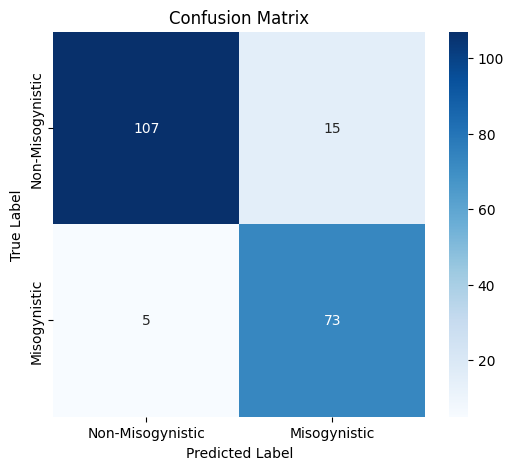

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(merged_data['labels'], merged_data['predictions'])

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Misogynistic", "Misogynistic"], yticklabels=["Non-Misogynistic", "Misogynistic"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Print first five samples with their actual and predicted labels
print("First 5 Samples with Actual and Predicted Labels:")
for index, row in merged_data.head(30).iterrows():
    print(f"Image ID: {row['image_id']}, Actual Label: {row['labels']}, Predicted Label: {row['predictions']}")


First 5 Samples with Actual and Predicted Labels:
Image ID: 954, Actual Label: 0, Predicted Label: 0
Image ID: 239, Actual Label: 0, Predicted Label: 0
Image ID: 61, Actual Label: 1, Predicted Label: 1
Image ID: 984, Actual Label: 0, Predicted Label: 0
Image ID: 774, Actual Label: 0, Predicted Label: 0
Image ID: 427, Actual Label: 1, Predicted Label: 1
Image ID: 960, Actual Label: 0, Predicted Label: 0
Image ID: 387, Actual Label: 0, Predicted Label: 0
Image ID: 520, Actual Label: 0, Predicted Label: 0
Image ID: 563, Actual Label: 1, Predicted Label: 1
Image ID: 856, Actual Label: 0, Predicted Label: 0
Image ID: 545, Actual Label: 1, Predicted Label: 1
Image ID: 511, Actual Label: 0, Predicted Label: 0
Image ID: 252, Actual Label: 0, Predicted Label: 1
Image ID: 742, Actual Label: 0, Predicted Label: 0
Image ID: 873, Actual Label: 0, Predicted Label: 0
Image ID: 566, Actual Label: 1, Predicted Label: 1
Image ID: 325, Actual Label: 0, Predicted Label: 0
Image ID: 760, Actual Label: 0, P

***Vision Transformer + IndicBERT***

***Vision Transformer + Malayalam BERT***

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel, ViTModel, ViTFeatureExtractor
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.metrics import classification_report

vit_model_name = "google/vit-base-patch16-224"
vit_model = ViTModel.from_pretrained(vit_model_name).to(device)
vit_feature_extractor = ViTFeatureExtractor.from_pretrained(vit_model_name)

# Define Dataset class
class MalayalamMemeDataset(Dataset):
    def __init__(self, csv_file, img_dir, max_len, transform=None):
        self.data = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.max_len = max_len
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        text = row["transcriptions"]
        label = torch.tensor(row["labels"], dtype=torch.long)
        img_path = os.path.join(self.img_dir, f"{row['image_id']}.jpg")

        # Process text
        encoded_text = tokenizer(
            text,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        input_ids = encoded_text["input_ids"].squeeze(0)
        attention_mask = encoded_text["attention_mask"].squeeze(0)

        # Process image
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return input_ids, attention_mask, image, label

# Define transformations for image data
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match ViT input size
    transforms.ToTensor(),
    transforms.Normalize(mean=vit_feature_extractor.image_mean, std=vit_feature_extractor.image_std),
])

# Define dataset paths
image_dir = '/kaggle/input/misogyny-meme/Train'
image_dir_dev = '/kaggle/input/misogyny-meme/Dev'
image_dir_test = '/kaggle/input/misogyny-meme/Test'

# Load datasets
train_dataset = MalayalamMemeDataset(
    csv_file="/kaggle/input/misogyny-meme/Train/train.csv",
    img_dir=image_dir,
    max_len=128,
    transform=image_transforms
)

val_dataset = MalayalamMemeDataset(
    csv_file="/kaggle/input/misogyny-meme/Dev/dev.csv",
    img_dir=image_dir_dev,
    max_len=128,
    transform=image_transforms
)

test_dataset = MalayalamMemeDataset(
    csv_file="/kaggle/input/misogyny-meme/Test/test.csv",
    img_dir=image_dir_test,
    max_len=128,
    transform=image_transforms
)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
class MultimodalClassifier(nn.Module):
    def __init__(self, bert_model, vit_model, num_classes=2):
        super(MultimodalClassifier, self).__init__()
        self.bert = bert_model
        self.vit = vit_model
        self.text_fc = nn.Linear(bert_model.config.hidden_size, 128)
        self.image_fc = nn.Linear(vit_model.config.hidden_size, 128)
        self.classifier = nn.Linear(256, num_classes)

    def forward(self, input_ids, attention_mask, images):
        # Text features
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        text_features = self.text_fc(bert_output.last_hidden_state[:, 0, :])

        # Image features
        vit_output = self.vit(pixel_values=images)
        image_features = self.image_fc(vit_output.last_hidden_state[:, 0, :])

        # Combine features
        combined_features = torch.cat((text_features, image_features), dim=1)
        logits = self.classifier(combined_features)
        return logits

# Initialize model, loss, and optimizer
model = MultimodalClassifier(bert_model, vit_model).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)


In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5):
    for epoch in range(epochs):
        model.train()
        train_loss, train_correct = 0, 0
        for input_ids, attention_mask, images, labels in train_loader:
            input_ids, attention_mask, images, labels = (
                input_ids.to(device),
                attention_mask.to(device),
                images.to(device),
                labels.to(device),
            )

            # Forward pass
            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask, images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_correct += (outputs.argmax(1) == labels).sum().item()

        train_acc = train_correct / len(train_loader.dataset)

        # Validation
        print(f"Epoch {epoch + 1}/{epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        evaluate_model(model, val_loader, criterion)

# Define evaluation function
def evaluate_model(model, val_loader, criterion):
    model.eval()
    val_loss, val_correct = 0, 0
    all_true_labels = []
    all_pred_labels = []

    with torch.no_grad():
        for input_ids, attention_mask, images, labels in val_loader:
            input_ids, attention_mask, images, labels = (
                input_ids.to(device),
                attention_mask.to(device),
                images.to(device),
                labels.to(device),
            )

            # Forward pass
            outputs = model(input_ids, attention_mask, images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Get predicted labels
            pred_labels = outputs.argmax(1)
            all_true_labels.extend(labels.cpu().numpy())
            all_pred_labels.extend(pred_labels.cpu().numpy())

            val_correct += (pred_labels == labels).sum().item()

    val_acc = val_correct / len(val_loader.dataset)
    val_loss = val_loss / len(val_loader)

    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")
    print("Classification Report:")
    print(classification_report(all_true_labels, all_pred_labels))

# Train and evaluate the model
train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5)
evaluate_model(model, val_loader, criterion)

Epoch 1/5, Train Loss: 23.3307, Train Acc: 0.7266
Validation Loss: 0.4750, Validation Accuracy: 0.8562
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89        97
           1       0.98      0.65      0.78        63

    accuracy                           0.86       160
   macro avg       0.89      0.82      0.84       160
weighted avg       0.88      0.86      0.85       160

Epoch 2/5, Train Loss: 14.0286, Train Acc: 0.8953
Validation Loss: 0.3627, Validation Accuracy: 0.8750
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        97
           1       0.88      0.79      0.83        63

    accuracy                           0.88       160
   macro avg       0.88      0.86      0.87       160
weighted avg       0.88      0.88      0.87       160

Epoch 3/5, Train Loss: 7.2237, Train Acc: 0.9547
Validation Loss: 0.3387, Validation Accuracy:

In [ ]:
import os
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, ViTModel, ViTFeatureExtractor
from torchvision import transforms
from PIL import Image

# Modified Dataset class for test data (without labels)
class MalayalamMemeTestDataset(Dataset):
    def __init__(self, csv_file, img_dir, max_len, transform=None):
        self.data = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.max_len = max_len
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        text = row["transcriptions"]
        img_path = os.path.join(self.img_dir, f"{row['image_id']}.jpg")

        # Process text
        encoded_text = tokenizer(
            text,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        input_ids = encoded_text["input_ids"].squeeze(0)
        attention_mask = encoded_text["attention_mask"].squeeze(0)

        # Process image
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return input_ids, attention_mask, image

# Define transformations for image data
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

import os
import torch
import pandas as pd
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report

# Function to generate predictions on the test dataset
# Function to generate predictions on the test dataset
def generate_predictions(model, test_loader):
    model.eval()
    predictions = []
    ids = []

    with torch.no_grad():
        for idx, (input_ids, attention_mask, images) in enumerate(test_loader):  # Track index (idx)
            input_ids, attention_mask, images = (
                input_ids.to(device),
                attention_mask.to(device),
                images.to(device),
            )

            # Forward pass
            outputs = model(input_ids, attention_mask, images)
            pred_labels = outputs.argmax(1).cpu().numpy()

            predictions.extend(pred_labels)
            # Correct the indexing of image_ids
            start_idx = input_ids.size(0) * idx
            end_idx = input_ids.size(0) * (idx + 1)
            ids.extend(test_loader.dataset.data['image_id'].iloc[start_idx:end_idx].values)

    return ids, predictions




# Load the test dataset and create DataLoader
test_dataset = MalayalamMemeTestDataset(
    csv_file="/kaggle/input/misogyny-meme/Test/test.csv",
    img_dir=image_dir_test,
    max_len=128,
    transform=image_transforms
)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Generate predictions for the test dataset
test_ids, test_predictions = generate_predictions(model, test_loader)

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    "id": test_ids,
    "predictions": test_predictions
})

# Save the submission file
submission_file = "/kaggle/working/One_by_zero_Malayalam_run4.csv"
submission_df.to_csv(submission_file, index=False, header=False)

# Create the zip file for submission
import zipfile

zip_file = "/kaggle/working/One_by_zero.run4.zip"
with zipfile.ZipFile(zip_file, 'w') as zf:
    zf.write(submission_file, os.path.basename(submission_file))

# Output path to the zip file
zip_file



'/kaggle/working/One_by_zero.run4.zip'

In [ ]:
# Step 1: Load the test data with actual labels
test_data_labels = pd.read_csv('/kaggle/input/misogyny-meme/Test_Labels/test_with_labels.csv')

# Merge predicted labels with actual labels
test_data_labels['predictions'] = test_predictions
merged_data = test_data_labels[['image_id', 'labels', 'predictions']]

# Step 2: Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Accuracy
accuracy = accuracy_score(merged_data['labels'], merged_data['predictions'])

# Precision, Recall, and F1-score (Macro)
precision, recall, f1, _ = precision_recall_fscore_support(merged_data['labels'], merged_data['predictions'], average='macro')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# You can also print a detailed classification report
print("Classification Report:")
print(classification_report(merged_data['labels'], merged_data['predictions']))


Accuracy: 0.8850
Precision (Macro): 0.8882
Recall (Macro): 0.8687
Macro F1-Score: 0.8763
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       122
           1       0.90      0.79      0.84        78

    accuracy                           0.89       200
   macro avg       0.89      0.87      0.88       200
weighted avg       0.89      0.89      0.88       200



***CLIP + Malayalam BERT***

In [ ]:
import os
import torch
import numpy as np
import pandas as pd
from torch import nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel, CLIPProcessor, CLIPModel
from PIL import Image
from sklearn.metrics import classification_report

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load tokenizer and pretrained BERT model
bert_model_name = "l3cube-pune/malayalam-bert"
tokenizer = BertTokenizer.from_pretrained(bert_model_name)
bert_model = BertModel.from_pretrained(bert_model_name).to(device)

# Load CLIP model and processor
clip_model_name = "openai/clip-vit-base-patch32"
clip_model = CLIPModel.from_pretrained(clip_model_name).to(device)
clip_processor = CLIPProcessor.from_pretrained(clip_model_name)


# Define Dataset
class MalayalamMemeDatasetCLIP(Dataset):
    def __init__(self, csv_file, img_dir, max_len):
        self.data = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        text = row["transcriptions"]
        label = torch.tensor(row["labels"], dtype=torch.long)
        img_path = os.path.join(self.img_dir, f"{row['image_id']}.jpg")

        # Process text
        encoded_text = tokenizer(
            text,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        input_ids = encoded_text["input_ids"].squeeze(0)
        attention_mask = encoded_text["attention_mask"].squeeze(0)

        # Process image with CLIP processor
        image = Image.open(img_path).convert("RGB")
        clip_image = clip_processor(images=image, return_tensors="pt")
        return input_ids, attention_mask, clip_image["pixel_values"].squeeze(0), label


class CLIPBertMultimodalClassifier(nn.Module):
    def __init__(self, bert_model, clip_model, num_classes=2):
        super(CLIPBertMultimodalClassifier, self).__init__()
        self.bert = bert_model
        self.clip = clip_model.vision_model
        self.text_fc = nn.Linear(bert_model.config.hidden_size, 128)
        self.image_fc = nn.Linear(768, 128)  # Adjust input size to match CLIP output
        self.classifier = nn.Linear(256, num_classes)

    def forward(self, input_ids, attention_mask, images):
        # Text features from Malayalam BERT
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        text_features = self.text_fc(bert_output.last_hidden_state[:, 0, :])

        # Image features from CLIP
        clip_image_features = self.clip(images)["last_hidden_state"][:, 0, :]
        image_features = self.image_fc(clip_image_features)

        # Combine features
        combined_features = torch.cat((text_features, image_features), dim=1)
        logits = self.classifier(combined_features)
        return logits



# Dataset paths
image_dir_train = '/kaggle/input/misogyny-meme/Train'
image_dir_dev = '/kaggle/input/misogyny-meme/Dev'
image_dir_test = '/kaggle/input/misogyny-meme/Test'

# Load datasets
train_dataset = MalayalamMemeDatasetCLIP(
    csv_file="/kaggle/input/misogyny-meme/Train/train.csv",
    img_dir=image_dir_train,
    max_len=128,
)

val_dataset = MalayalamMemeDatasetCLIP(
    csv_file="/kaggle/input/misogyny-meme/Dev/dev.csv",
    img_dir=image_dir_dev,
    max_len=128,
)


train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
#test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize model, loss, and optimizer
model = CLIPBertMultimodalClassifier(bert_model, clip_model).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)


# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5):
    for epoch in range(epochs):
        model.train()
        train_loss, train_correct = 0, 0
        for input_ids, attention_mask, images, labels in train_loader:
            input_ids, attention_mask, images, labels = (
                input_ids.to(device),
                attention_mask.to(device),
                images.to(device),
                labels.to(device),
            )

            # Forward pass
            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask, images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_correct += (outputs.argmax(1) == labels).sum().item()

        train_acc = train_correct / len(train_loader.dataset)

        print(f"Epoch {epoch + 1}/{epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")

        evaluate_model(model, val_loader, criterion)


# Evaluation function
def evaluate_model(model, val_loader, criterion):
    model.eval()
    val_loss, val_correct = 0, 0
    all_true_labels = []
    all_pred_labels = []

    with torch.no_grad():
        for input_ids, attention_mask, images, labels in val_loader:
            input_ids, attention_mask, images, labels = (
                input_ids.to(device),
                attention_mask.to(device),
                images.to(device),
                labels.to(device),
            )

            # Forward pass
            outputs = model(input_ids, attention_mask, images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Get predicted labels
            pred_labels = outputs.argmax(1)
            all_true_labels.extend(labels.cpu().numpy())
            all_pred_labels.extend(pred_labels.cpu().numpy())

            val_correct += (pred_labels == labels).sum().item()

    val_acc = val_correct / len(val_loader.dataset)
    val_loss = val_loss / len(val_loader)

    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")
    print("Classification Report:")
    print(classification_report(all_true_labels, all_pred_labels))


# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5)

# Evaluate the model on validation set
evaluate_model(model, val_loader, criterion)


Using device: cuda


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at l3cube-pune/malayalam-bert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Epoch 1/5, Train Loss: 19.3317, Train Acc: 0.7875
Validation Loss: 0.3441, Validation Accuracy: 0.8500
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        97
           1       0.84      0.76      0.80        63

    accuracy                           0.85       160
   macro avg       0.85      0.83      0.84       160
weighted avg       0.85      0.85      0.85       160

Epoch 2/5, Train Loss: 6.0077, Train Acc: 0.9484
Validation Loss: 0.5320, Validation Accuracy: 0.7937
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.71      0.81        97
           1       0.67      0.92      0.78        63

    accuracy                           0.79       160
   macro avg       0.80      0.82      0.79       160
weighted avg       0.83      0.79      0.80       160

Epoch 3/5, Train Loss: 1.2866, Train Acc: 0.9953
Validation Loss: 0.4610, Validation Accuracy: 

In [ ]:
import os
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, ViTModel, ViTFeatureExtractor
from torchvision import transforms
from PIL import Image

# Modified Dataset class for test data (without labels)
class MalayalamMemeTestDataset(Dataset):
    def __init__(self, csv_file, img_dir, max_len, transform=None):
        self.data = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.max_len = max_len
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        text = row["transcriptions"]
        img_path = os.path.join(self.img_dir, f"{row['image_id']}.jpg")

        # Process text
        encoded_text = tokenizer(
            text,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        input_ids = encoded_text["input_ids"].squeeze(0)
        attention_mask = encoded_text["attention_mask"].squeeze(0)

        # Process image
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return input_ids, attention_mask, image

# Define transformations for image data
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
import os
import torch
import pandas as pd
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report

# Function to generate predictions on the test dataset
# Function to generate predictions on the test dataset
def generate_predictions(model, test_loader):
    model.eval()
    predictions = []
    ids = []

    with torch.no_grad():
        for batch_idx, (input_ids, attention_mask, images) in enumerate(test_loader):
            input_ids, attention_mask, images = (
                input_ids.to(device),
                attention_mask.to(device),
                images.to(device),
            )

            # Forward pass
            outputs = model(input_ids, attention_mask, images)
            pred_labels = outputs.argmax(1).cpu().numpy()
            predictions.extend(pred_labels)

            # Fetch the corresponding image IDs
            batch_ids = test_loader.dataset.data.iloc[
                batch_idx * len(pred_labels) : (batch_idx + 1) * len(pred_labels)
            ]["image_id"]
            ids.extend(batch_ids.values)

    return ids, predictions



# Load the test dataset and create DataLoader
test_dataset = MalayalamMemeTestDataset(
    csv_file="/kaggle/input/misogyny-meme/Test/test.csv",
    img_dir=image_dir_test,
    max_len=128,
    transform=image_transforms
)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Generate predictions for the test dataset
test_ids, test_predictions = generate_predictions(model, test_loader)

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    "id": test_ids,
    "predictions": test_predictions
})

# Save the submission file
submission_file = "/kaggle/working/One_by_zero_Malayalam_run2.csv"
submission_df.to_csv(submission_file, index=False, header=False)

# Create the zip file for submission
import zipfile

zip_file = "/kaggle/working/One_by_zero.run2.zip"
with zipfile.ZipFile(zip_file, 'w') as zf:
    zf.write(submission_file, os.path.basename(submission_file))

# Output path to the zip file
zip_file


'/kaggle/working/One_by_zero.run2.zip'

In [ ]:
# Step 1: Load the test data with actual labels
test_data_labels = pd.read_csv('/kaggle/input/misogyny-meme/Test_Labels/test_with_labels.csv')

# Merge predicted labels with actual labels
test_data_labels['predictions'] = test_predictions
merged_data = test_data_labels[['image_id', 'labels', 'predictions']]

# Step 2: Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Accuracy
accuracy = accuracy_score(merged_data['labels'], merged_data['predictions'])

# Precision, Recall, and F1-score (Macro)
precision, recall, f1, _ = precision_recall_fscore_support(merged_data['labels'], merged_data['predictions'], average='macro')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# You can also print a detailed classification report
print("Classification Report:")
print(classification_report(merged_data['labels'], merged_data['predictions']))


Accuracy: 0.8600
Precision (Macro): 0.8762
Recall (Macro): 0.8321
Macro F1-Score: 0.8451
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       122
           1       0.92      0.71      0.80        78

    accuracy                           0.86       200
   macro avg       0.88      0.83      0.85       200
weighted avg       0.87      0.86      0.86       200

